In [43]:
# Einlesen der Daten sowie die auswahl der Features

import pandas as pd
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor


test_dir="./case_data/BikeRentalDaily_test.csv"
train_dir="./case_data/training_data_preprocessed_v3.1_baseline.csv"


test_contents = pd.read_csv(test_dir, sep=';')
test_contents = test_contents.dropna()


train_contents = pd.read_csv(train_dir, sep=';')
train_contents = train_contents.dropna()

# Für die speicherung des mae der verschiedenen
results_method_mae = []


# feature_cols = ["instant","season","yr","mnth","weathersit","temp","atemp","hum","windspeed"]
feature_cols = ["instant","season","yr","temp","atemp"]

X = train_contents.loc[:, feature_cols]
y = train_contents.cnt

X_test = test_contents.loc[:, feature_cols]
y_test = test_contents.cnt

test_contents.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,299,26.10.2011,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894
1,458,02.04.2012,2.0,1,4,0,1,1,1,17.3565,0.427513,75.65220,0.312139,518,0,1208,4728,5936
2,687,17.11.2012,4.0,1,11,0,6,0,1,13.0000,0.326383,81.81255,0.179729,766,0,1313,4316,5629
4,291,18.10.2011,4.0,0,10,0,2,1,2,21.3000,0.522721,105.25005,0.110087,463,0,637,4111,4748
5,53,22.02.2011,1.0,0,2,0,2,1,1,7.2889,0.186033,86.66670,0.195683,516,0,74,1376,1450


In [44]:
# Durchführung der Linearen Regression

linreg = LinearRegression()

linreg.fit(X,y)

pred = linreg.predict(X_test)

mae = mean_absolute_error(y_test, pred)
print('MAE: %.3f' % mae)

score = linreg.score(X_test, y_test)

print(f"linreg score: {score}")

results_method_mae.append(["linear regression", mae])

MAE: 937.292
linreg score: 0.3541525051411326


In [45]:
# Durchführung der Huber Regression

pipe = make_pipeline(StandardScaler(), HuberRegressor())

pipe.fit(X,y)

pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, pred)
print('MAE: %.3f' % mae)
score = pipe.score(X_test, y_test)

print(f"Huber Regressor score: {score}")

results_method_mae.append(["Huber Regressor", mae])

MAE: 922.387
Huber Regressor score: 0.3593971139582831


In [46]:
# Durchführung der polynomialen Regression

degree=4

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)


pred = polyreg.predict(X_test)

mae = mean_absolute_error(y_test, pred)

score = polyreg.score(X_test, y_test)
print(f"Polynomiale Regression mit einem degree von {degree}:")
print('MAE: %.3f' % mae)
print(f"Score: {score}\n")

results_method_mae.append([f"polynominal regression degree={degree}", mae])



# Durchführung der polynomialen Regression mit anderem degree Wert zu demonstarationszwecken

degree=3

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)

pred = polyreg.predict(X_test)

mae = mean_absolute_error(y_test, pred)

score = polyreg.score(X_test, y_test)
print(f"Polynomiale Regression mit einem degree von {degree}:")
print('MAE: %.3f' % mae)
print(f"Score: {score}")

results_method_mae.append([f"polynominal regression degree={degree}", mae])

Polynomiale Regression mit einem degree von 4:
MAE: 866.562
Score: 0.43145127641286973

Polynomiale Regression mit einem degree von 3:
MAE: 866.724
Score: 0.42852954862628045


In [47]:
# Durchführung des KNN

neighbors = 20

#Initialize and fit KNN regression
KNN_reg = KNeighborsRegressor(n_neighbors=neighbors)
KNN_reg.fit(X, y)

#Predict all test examples
ypred = KNN_reg.predict(X_test)

mae = mean_absolute_error(y_test, ypred)
score = KNN_reg.score(X_test, y_test)

print(f"KNN mit {neighbors} neighbors:")
print('MAE: %.3f' % mae)
print(f"Score: {score}\n")

results_method_mae.append([f"KNN n_neighbors={neighbors}", mae])


# Durchführung des KNN mit anderer anzahl neighbors zu demonstarationszwecken

neighbors = 3
#Initialize and fit KNN regression
KNN_reg = KNeighborsRegressor(n_neighbors=neighbors)
KNN_reg.fit(X, y)

#Predict all test examples
ypred = KNN_reg.predict(X_test)

mae = mean_absolute_error(y_test, ypred)
score = KNN_reg.score(X_test, y_test)

print(f"KNN mit {neighbors} neighbors:")
print('MAE: %.3f' % mae)
print(f"Score: {score}")


results_method_mae.append([f"KNN n_neighbors={neighbors}", mae])

KNN mit 20 neighbors:
MAE: 927.303
Score: 0.381431380584374

KNN mit 3 neighbors:
MAE: 842.238
Score: 0.37401807084260197


In [48]:
# Durchführung der Support Vector Machine

kernel= 'poly'
degree = 3
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=kernel, degree=degree))
clf.fit(X, y)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

ypred = clf.predict(X_test)
mae = mean_absolute_error(y_test, ypred)

score = clf.score(X_test, y_test)

results_method_mae.append([f"SVM kernel={kernel} degree={degree}", mae])

print(f"SVM mit dem kernel {kernel} einem degree von {degree}:")
print('MAE: %.3f' % mae)
print(f"Score: {score}\n")


# Durchführung der Support Vector Machine mit anderem degree Wert zu demonstarationszwecken

kernel= 'poly'
degree = 1
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=kernel,  degree=degree))
clf.fit(X, y)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

ypred = clf.predict(X_test)
mae = mean_absolute_error(y_test, ypred)

score = clf.score(X_test, y_test)

results_method_mae.append([f"SVM kernel={kernel} degree={degree}", mae])

print(f"SVM mit dem kernel {kernel} einem degree von {degree}:")
print('MAE: %.3f' % mae)
print(f"Score: {score}")


SVM mit dem kernel poly einem degree von 3:
MAE: 1008.817
Score: 0.0

SVM mit dem kernel poly einem degree von 1:
MAE: 998.939
Score: 0.0


In [49]:
# Anzeige der Ergebnisse in Tabellenform

df_results = pd.DataFrame(results_method_mae, columns = ['Method', 'MAE'])

# Show results of methods
df_results

,Method,MAE
0,linear regression,937.291909
1,Huber Regressor,922.387352
2,polynominal regression degree=4,866.562276
3,polynominal regression degree=3,866.723658
4,KNN n_neighbors=20,927.302609
5,KNN n_neighbors=3,842.237681
6,SVM kernel=poly degree=3,1008.817391
7,SVM kernel=poly degree=1,998.939130


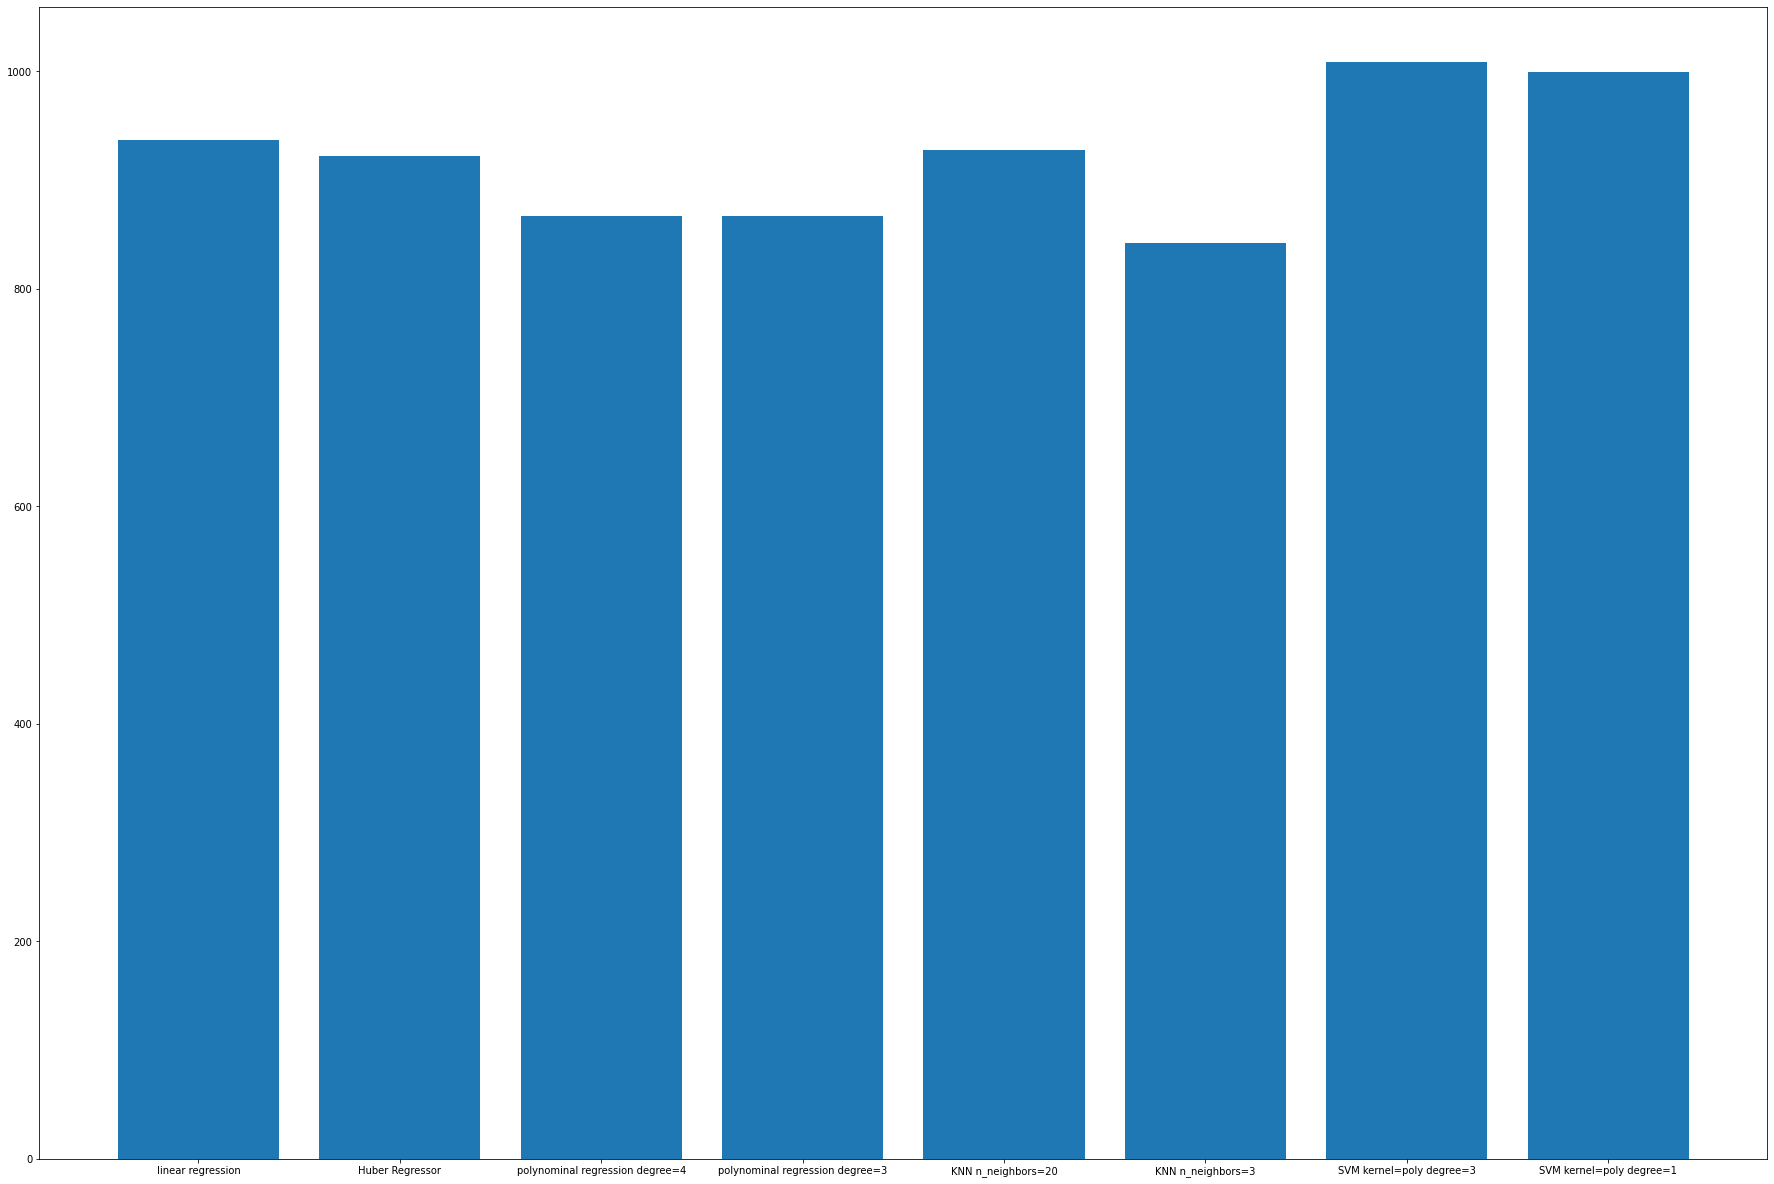

In [50]:
# Anzeige der Ergebnisse in Diagrammform

import matplotlib.pyplot as plt

# Visualize resuts of data frame

fig = plt.figure()
ax = fig.add_axes([0,0,4,4])

ax.bar(df_results.Method,df_results.MAE)
plt.show()

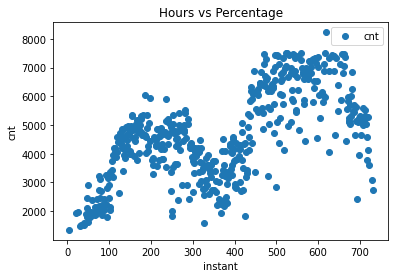

In [51]:
# Visualisierung der verteilung der cnt Werte über den gesamten Zeitraum

x_plot = 'instant'

train_contents.plot(x=x_plot, y='cnt', style='o')
plt.title('Hours vs Percentage')
plt.xlabel(x_plot)
plt.ylabel('cnt')
plt.show()
